## Evaluation of the Parameter Search

- discover the best parameter settings for each algorithm
- display and export the best 3 parameter settings for the final test runs

## 0. Import Modules

In [4]:
import os
import sys
from pathlib import Path

# setting proper working directory
PROJECT_DIRECTORY = Path(os.path.abspath('')).resolve().parents[0]
sys.path.extend([str(PROJECT_DIRECTORY)])

print(f'Python {sys.version} on {sys.platform}')
print('Project directory: ', PROJECT_DIRECTORY)

Python 3.9.19 | packaged by conda-forge | (main, Mar 20 2024, 12:38:46) [MSC v.1929 64 bit (AMD64)] on win32
Project directory:  C:\Users\s8347434\Documents\RecSys2024


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Read the Parameter Search Files

In [34]:
filename = PROJECT_DIRECTORY / "data/evaluation/parameter_tuning/als-mf-top10-100user-leaveK-5000000Rows.txt"
als_eval_df = pd.read_csv(filename, sep="\t", encoding="utf-16")

print(als_eval_df.head(2))
print(als_eval_df.shape)

                Evaluator  MatchCount  Precision    MR       MRR       MAP  \
0  ALSMatrixFactorization          57      0.057  0.36  0.191536  0.159214   
1  ALSMatrixFactorization          57      0.057  0.35  0.176286  0.146800   

       NDCG  Coverage  APLT       ARP    a  regularization  factors  \
0  0.224832  0.008332   0.0  4121.451  0.8             0.3       20   
1  0.212467  0.008173   0.0  4139.794  0.8             0.3       20   

   iterations  
0          10  
1          20  
(324, 14)


In [7]:
filename = PROJECT_DIRECTORY / "data/evaluation/parameter_tuning/user-based-top10-100user-leaveK-500000Rows.txt"
user_eval_df = pd.read_csv(filename, sep="\t", encoding="utf-16")

print(user_eval_df.head(2))
print(user_eval_df.shape)

  Evaluator  MatchCount  Precision    MR       MRR       MAP      NDCG  \
0   UserKNN          61      0.061  0.42  0.230052  0.193149  0.267650   
1   UserKNN         100      0.100  0.60  0.279909  0.210274  0.341154   

   Coverage   APLT      ARP  alpha  q  neighborhood_size  
0  0.021117  0.119  388.076    0.0  1                  5  
1  0.016132  0.060  531.205    0.0  1                 10  
(252, 13)


In [8]:
filename = PROJECT_DIRECTORY / "data/evaluation/parameter_tuning/user-based-iterative-asym-top10-100user-leaveK-500000Rows.txt"
user_async_eval_df = pd.read_csv(filename, sep="\t", encoding="utf-16")

print(user_async_eval_df.head(2))
print(user_async_eval_df.shape)

              Evaluator  MatchCount  Precision    MR       MRR       MAP  \
0  UserIterativeAsymKNN          28      0.028  0.20  0.045413  0.038166   
1  UserIterativeAsymKNN          32      0.032  0.16  0.064873  0.050757   

       NDCG  Coverage   APLT     ARP  alpha  q  beta  neighborhood_size  
0  0.081536  0.027243  0.469  73.577    0.0  1   0.3                 10  
1  0.090666  0.024963  0.892  21.520    0.0  1   0.3                 50  
(1470, 14)


In [15]:
filename = PROJECT_DIRECTORY / "data/evaluation/parameter_tuning/user-based-iterative-asym-top10-full_neighborhood-100user-leaveK-500000Rows.txt"
user_async_full_eval_df = pd.read_csv(filename, sep="\t", encoding="utf-16")

print(user_async_full_eval_df.head(2))
print(user_async_full_eval_df.shape)

              Evaluator  MatchCount  Precision    MR       MRR       MAP  \
0  UserIterativeAsymKNN          28      0.028  0.20  0.045413  0.038166   
1  UserIterativeAsymKNN          32      0.032  0.16  0.064873  0.050757   

       NDCG  Coverage   APLT     ARP  alpha  q  beta  neighborhood_size  
0  0.081536  0.027243  0.469  73.577    0.0  1   0.3               10.0  
1  0.090666  0.024963  0.892  21.520    0.0  1   0.3               50.0  
(1764, 14)


In [16]:
filename = PROJECT_DIRECTORY / "data/evaluation/parameter_tuning/item-based-iterative-asym-top10-100user-leaveK-100000Rows.txt"
item_async_eval_df = pd.read_csv(filename, sep="\t", encoding="utf-16")

print(item_async_eval_df.head(2))
print(item_async_eval_df.shape)

              Evaluator  MatchCount  Precision   MR  MRR  MAP  NDCG  Coverage  \
0  ItemIterativeAsymKNN           0        0.0  0.0  0.0  0.0   0.0  0.019711   
1  ItemIterativeAsymKNN           0        0.0  0.0  0.0  0.0   0.0  0.016104   

   APLT     ARP  alpha  q  beta  neighborhood_size  
0   0.0  45.294    0.0  1   0.3                 10  
1   0.0  54.729    0.0  1   0.3                 50  
(1470, 14)


In [17]:
filename = PROJECT_DIRECTORY / "data/evaluation/parameter_tuning/item-based-iterative-asym-top10-full_neighborhood-100user-leaveK-500000Rows.txt"
item_async_full_eval_df = pd.read_csv(filename, sep="\t", encoding="utf-16")

print(item_async_full_eval_df.head(2))
print(item_async_full_eval_df.shape)

              Evaluator  MatchCount  Precision    MR     MRR     MAP  \
0  ItemIterativeAsymKNN           0      0.000  0.00  0.0000  0.0000   
1  ItemIterativeAsymKNN           2      0.002  0.02  0.0075  0.0075   

       NDCG  Coverage   APLT     ARP  alpha  q  beta  neighborhood_size  
0  0.000000  0.015313  0.010  95.703    0.0  1   0.3                NaN  
1  0.010616  0.030483  0.837  12.957    0.0  1   0.5                NaN  
(294, 14)


## 2. Evaluate the Parameter Settings

In [25]:
overall_eval_df = pd.concat([als_eval_df, user_eval_df, user_async_eval_df, user_async_full_eval_df, item_async_eval_df, item_async_full_eval_df], ignore_index=True)
overall_eval_df[overall_eval_df.isna()] = 0
print(overall_eval_df.head(2))

                Evaluator  MatchCount  Precision    MR       MRR       MAP  \
0  ALSMatrixFactorization          57      0.057  0.36  0.191536  0.159214   
1  ALSMatrixFactorization          57      0.057  0.35  0.176286  0.146800   

       NDCG  Coverage  APLT       ARP    a  regularization  factors  \
0  0.224832  0.008332   0.0  4121.451  0.8             0.3     20.0   
1  0.212467  0.008173   0.0  4139.794  0.8             0.3     20.0   

   iterations  alpha    q  neighborhood_size  beta  
0        10.0    0.0  0.0                0.0   0.0  
1        20.0    0.0  0.0                0.0   0.0  


In [26]:
TOP_VALUES = 1
overall_eval_df.groupby('Evaluator').apply(lambda x: x.nlargest(TOP_VALUES, 'NDCG')).reset_index(drop=True)

C:\Users\s8347434\AppData\Local\Temp\5\ipykernel_40224\1608472305.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  overall_eval_df.groupby('Evaluator').apply(lambda x: x.nlargest(TOP_VALUES, 'NDCG')).reset_index(drop=True)


,Evaluator,MatchCount,Precision,MR,MRR,MAP,NDCG,Coverage,APLT,ARP,a,regularization,factors,iterations,alpha,q,neighborhood_size,beta
0,ALSMatrixFactorization,95,0.095,0.55,0.278607,0.221468,0.340508,0.010749,0.002,3609.005,1.0,1.0,65.0,10.0,0.0,0.0,0.0,0.0
1,ItemIterativeAsymKNN,125,0.125,0.60,0.287385,0.200873,0.352201,0.017343,0.178,563.566,0.0,0.0,0.0,0.0,0.8,2.0,0.0,1.4
2,UserIterativeAsymKNN,166,0.166,0.71,0.435762,0.288118,0.480795,0.010577,0.023,745.381,0.0,0.0,0.0,0.0,0.0,1.0,200.0,0.7
3,UserKNN,161,0.161,0.81,0.395710,0.279426,0.479568,0.013604,0.038,629.892,0.0,0.0,0.0,0.0,0.5,4.0,100.0,0.0


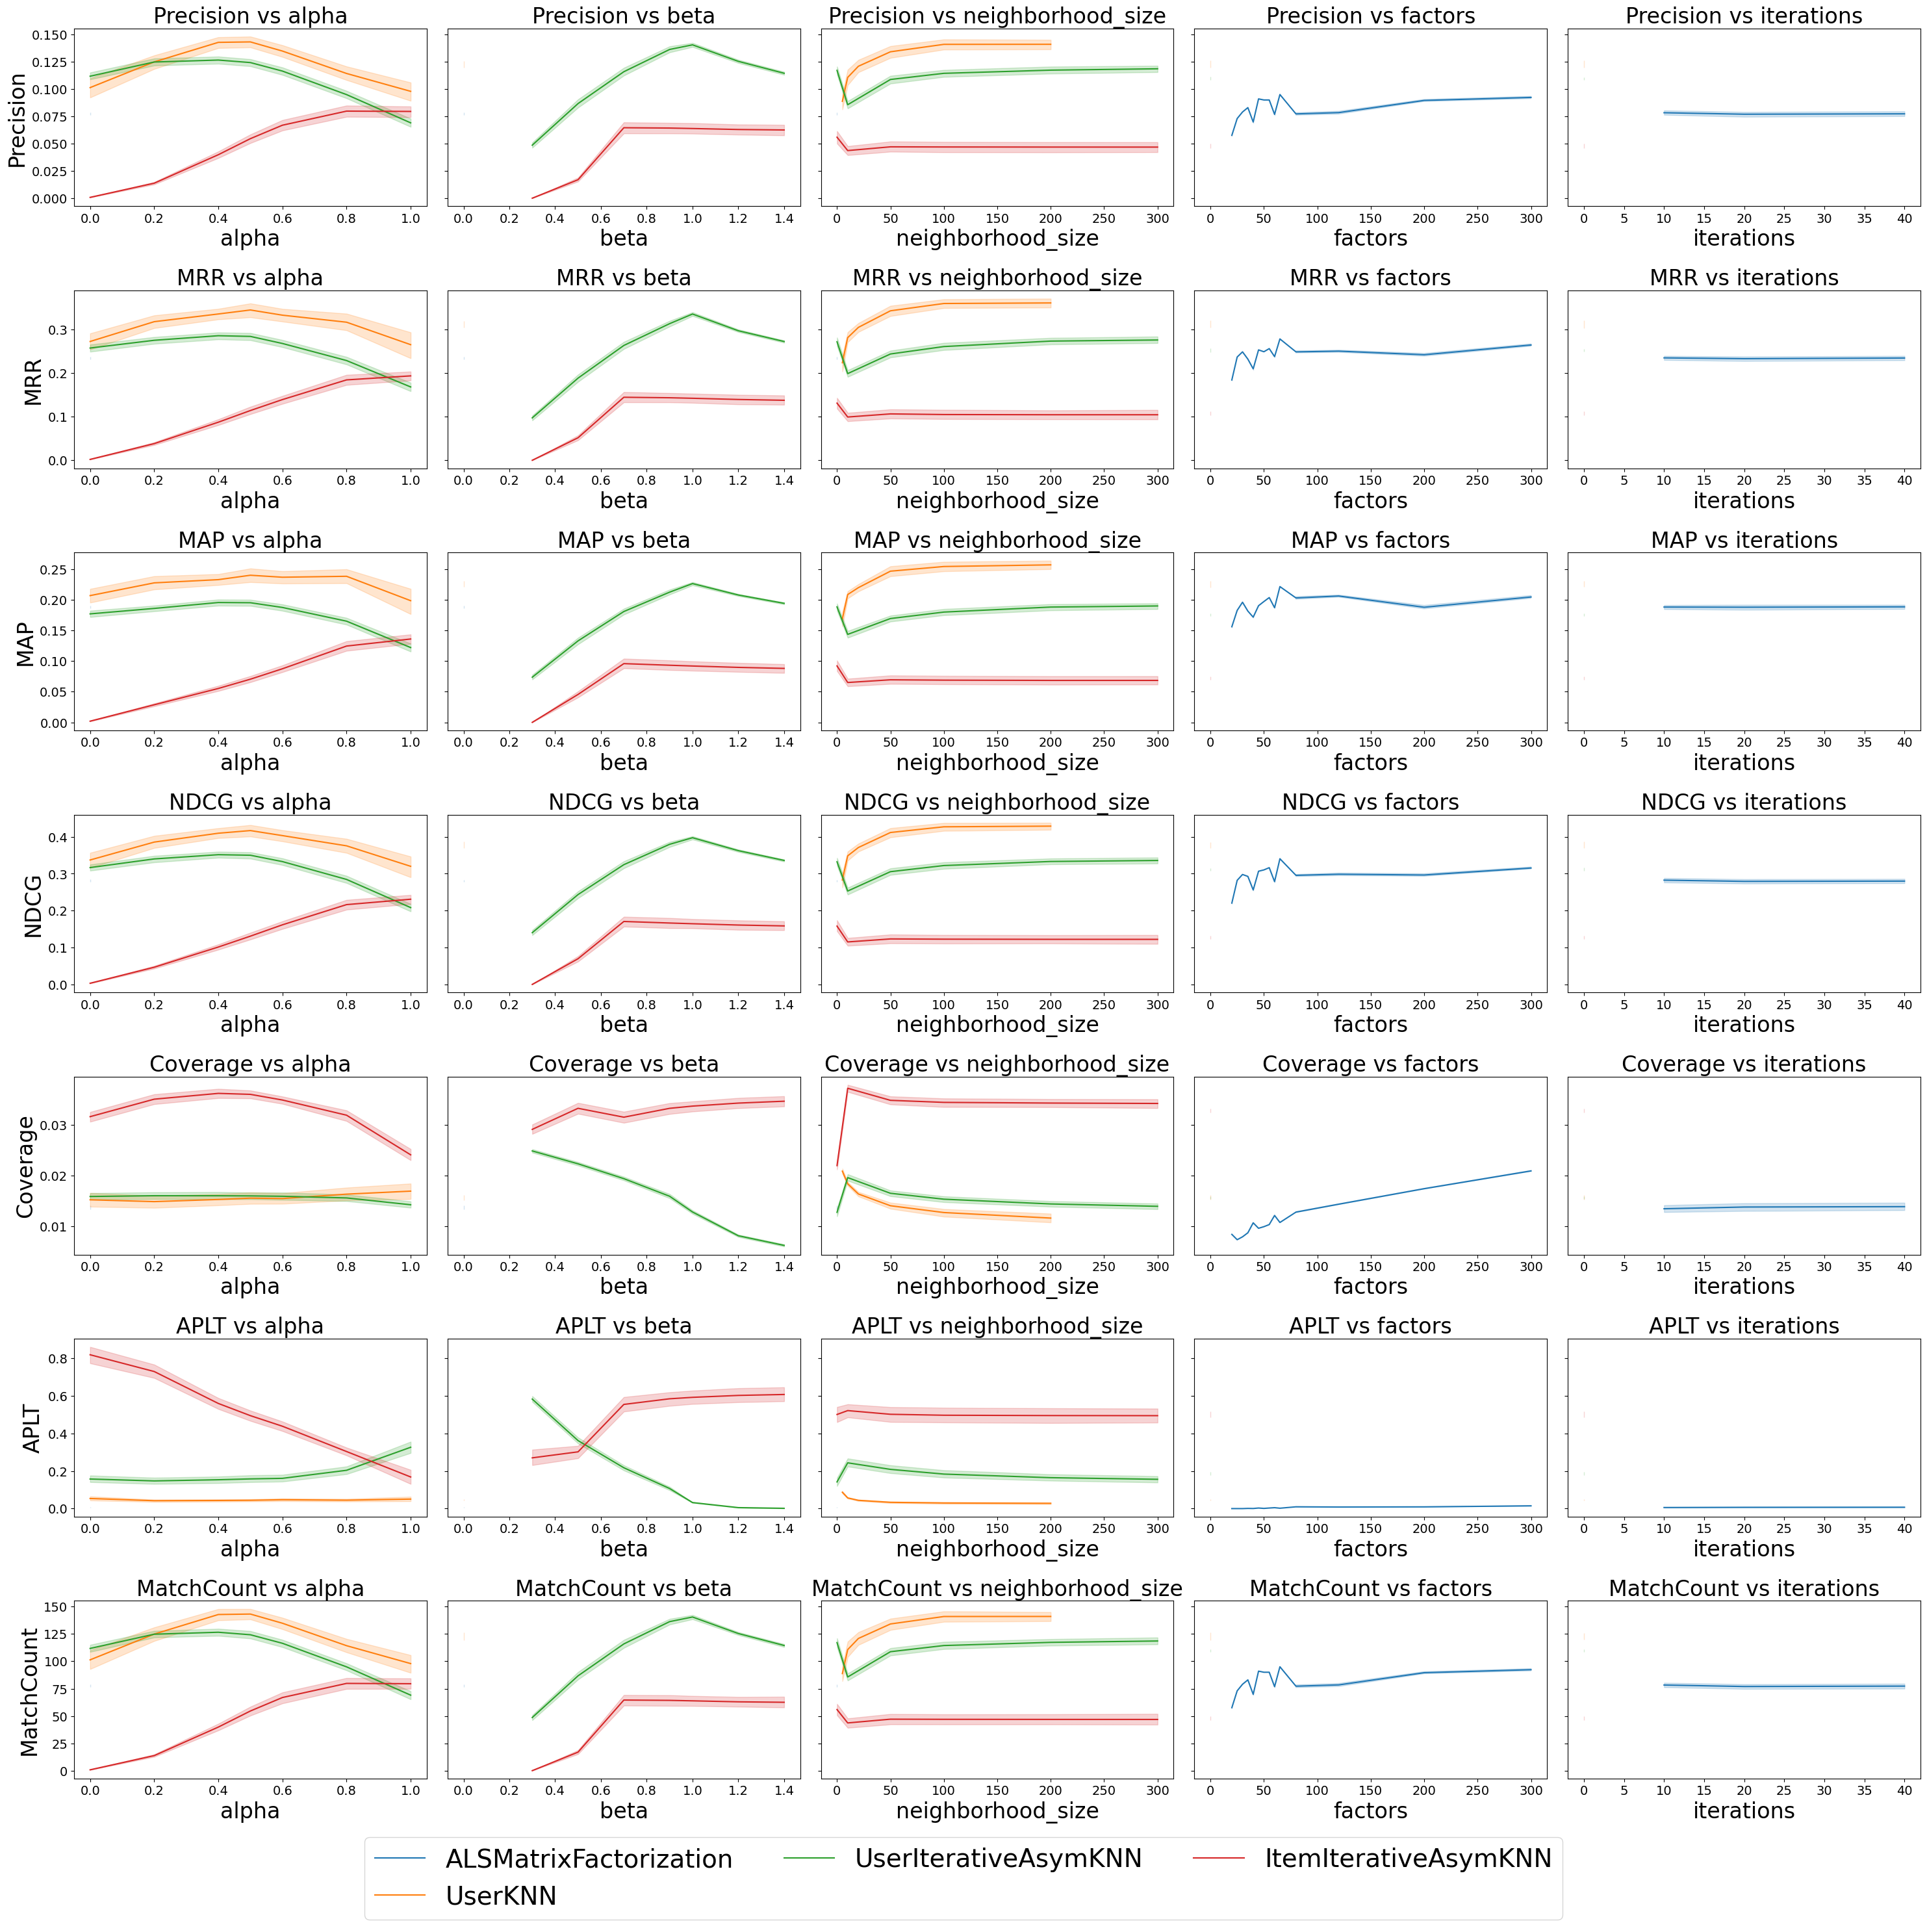

In [27]:
metrics = ['Precision', 'MRR', 'MAP', 'NDCG', 'Coverage', 'APLT', 'MatchCount']
parameters = ['alpha', 'beta', 'neighborhood_size', 'factors', 'iterations', ]

# Set the font size parameters globally
plt.rcParams.update({
    'font.size': 18,           # Base font size
    'axes.titlesize': 24,      # Title font size
    'axes.labelsize': 24,      # Axis labels font size
    'xtick.labelsize': 14,     # X-tick labels font size
    'ytick.labelsize': 14,     # Y-tick labels font size
    'legend.fontsize': 28,     # Legend font size
    'legend.title_fontsize': 28, # Legend title font size
})

def plot_metrics(data, metrics, parameters):
    fig, axes = plt.subplots(len(metrics), len(parameters), figsize=(30, 30), sharey='row')
    
    for i, metric in enumerate(metrics):
        for j, parameter in enumerate(parameters):
            sns.lineplot(x=parameter, y=metric, hue="Evaluator", data=data, ax=axes[i, j], legend=True)
            axes[i, j].legend_.remove() 
            axes[i, j].set_title(f'{metric} vs {parameter}')
            axes[i, j].set_xlabel(parameter)
            axes[i, j].set_ylabel(metric)

    handles, labels = axes[-1, -1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=3)
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

plot_metrics(overall_eval_df, metrics, parameters)

## 3. Export the best 3 Parameter Settings for each Algorithm

In [23]:
best3_parameter_settings = overall_eval_df.groupby('Evaluator').apply(lambda x: x.nlargest(3, 'NDCG')).reset_index(drop=True)
# best3_parameter_settings.to_csv("../data/evaluation/best3_parameter_settings.txt", sep="\t", encoding='utf-16', index=False)

C:\Users\s8347434\AppData\Local\Temp\5\ipykernel_42740\3750853482.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best3_parameter_settings = overall_eval_df.groupby('Evaluator').apply(lambda x: x.nlargest(3, 'NDCG')).reset_index(drop=True)
